**Table of contents**<a id='toc0_'></a>    
- [Yahoo Finance Stock Data](#toc1_)    
  - [Decomposition & ADF and KPSS Tests for Stationarity](#toc1_1_)    
- [Reddit data](#toc2_)    

<!-- vscode-jupyter-toc-config
	numbering=false
	anchor=true
	flat=false
	minLevel=1
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

# <a id='toc1_'></a>[Yahoo Finance Stock Data](#toc0_)

In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
import textwrap
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller, kpss
import praw

In [2]:
stock_names = ['ONCO', 'CNEY', 'TNXP', 'APLD', 'KTTA']

start_date = '2023-09-26'
end_date = '2024-09-26'

stocks = []

for stock in stock_names:
    data = yf.download(stock, start=start_date, end=end_date)

    ticker = yf.Ticker(stock)
    stock_info = ticker.info

    data['Industry'] = stock_info.get('industry', 'N/A')
    data['Sector'] = stock_info.get('sector', 'N/A')
    data['Marketcap'] = stock_info.get('marketCap', 'N/A')
    data['Fulltimeemployees'] = stock_info.get('fullTimeEmployees', 'N/A')
    data['Volume'] = stock_info.get('volume', 'N/A')
    data['PEratio'] = stock_info.get('trailingPE', 'N/A')
    data['Dividendyield'] = stock_info.get('dividendYield', 'N/A')
    data['Companyinfo'] = stock_info.get('longBusinessSummary', 'N/A')
    data['Ticker'] = stock
    data.reset_index(inplace=True)

    stocks.append(data)


df = pd.concat(stocks, ignore_index=True)
df.set_index('Date', inplace=True)
print(df.shape, df.head())

df.to_csv('stocks.csv', index=False)
df.shape

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


(1260, 14)                  Open       High        Low      Close  Adj Close  Volume  \
Date                                                                        
2023-09-26  24.160000  24.160000  20.200001  23.120001  23.120001   17620   
2023-09-27  22.400000  23.040001  22.000000  22.080000  22.080000   17620   
2023-09-28  20.799999  23.040001  20.200001  21.160000  21.160000   17620   
2023-09-29  20.559999  21.639999  20.400000  20.480000  20.480000   17620   
2023-10-02  21.840000  21.840000  20.000000  20.719999  20.719999   17620   

                 Industry      Sector  Marketcap  Fulltimeemployees PEratio  \
Date                                                                          
2023-09-26  Biotechnology  Healthcare   41802364                 12     N/A   
2023-09-27  Biotechnology  Healthcare   41802364                 12     N/A   
2023-09-28  Biotechnology  Healthcare   41802364                 12     N/A   
2023-09-29  Biotechnology  Healthcare   41802364      

(1260, 14)

In [3]:
df.head()

,Open,High,Low,Close,Adj Close,Volume,Industry,Sector,Marketcap,Fulltimeemployees,PEratio,Dividendyield,Companyinfo,Ticker
Date,,,,,,,,,,,,,,
2023-09-26,24.160000,24.160000,20.200001,23.120001,23.120001,17620,Biotechnology,Healthcare,41802364,12,N/A,N/A,"Onconetix, Inc., a biotechnology company, focu...",ONCO
2023-09-27,22.400000,23.040001,22.000000,22.080000,22.080000,17620,Biotechnology,Healthcare,41802364,12,N/A,N/A,"Onconetix, Inc., a biotechnology company, focu...",ONCO
2023-09-28,20.799999,23.040001,20.200001,21.160000,21.160000,17620,Biotechnology,Healthcare,41802364,12,N/A,N/A,"Onconetix, Inc., a biotechnology company, focu...",ONCO
2023-09-29,20.559999,21.639999,20.400000,20.480000,20.480000,17620,Biotechnology,Healthcare,41802364,12,N/A,N/A,"Onconetix, Inc., a biotechnology company, focu...",ONCO
2023-10-02,21.840000,21.840000,20.000000,20.719999,20.719999,17620,Biotechnology,Healthcare,41802364,12,N/A,N/A,"Onconetix, Inc., a biotechnology company, focu...",ONCO


In [4]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume,Industry,Sector,Marketcap,Fulltimeemployees,PEratio,Dividendyield,Companyinfo,Ticker
Date,,,,,,,,,,,,,,
2024-09-19,6.28,6.299,4.623,4.800,4.800,9173,Biotechnology,Healthcare,5084669,8,N/A,N/A,"Pasithea Therapeutics Corp., a biotechnology c...",KTTA
2024-09-20,4.68,4.800,4.420,4.420,4.420,9173,Biotechnology,Healthcare,5084669,8,N/A,N/A,"Pasithea Therapeutics Corp., a biotechnology c...",KTTA
2024-09-23,4.42,4.700,4.100,4.100,4.100,9173,Biotechnology,Healthcare,5084669,8,N/A,N/A,"Pasithea Therapeutics Corp., a biotechnology c...",KTTA
2024-09-24,4.11,4.315,3.835,3.963,3.963,9173,Biotechnology,Healthcare,5084669,8,N/A,N/A,"Pasithea Therapeutics Corp., a biotechnology c...",KTTA
2024-09-25,4.00,4.110,3.800,3.845,3.845,9173,Biotechnology,Healthcare,5084669,8,N/A,N/A,"Pasithea Therapeutics Corp., a biotechnology c...",KTTA


In [5]:
df.replace('N/A', None, inplace=True) #replace srings with nonetype
df.isna().any() #check for nones

Open                 False
High                 False
Low                  False
Close                False
Adj Close            False
Volume               False
Industry             False
Sector               False
Marketcap            False
Fulltimeemployees    False
PEratio               True
Dividendyield         True
Companyinfo          False
Ticker               False
dtype: bool

In [6]:
print(df.PEratio.isna().all(), df.Dividendyield.isna().all()) #check if all items are nones

True True


In [7]:
df=df.drop(columns=['PEratio', 'Dividendyield']) #drop these columns

In [8]:
df.rename(columns={'Adj Close':'Adjclose'}, inplace=True) #rename column
df.dtypes

Open                 float64
High                 float64
Low                  float64
Close                float64
Adjclose             float64
Volume                 int64
Industry              object
Sector                object
Marketcap              int64
Fulltimeemployees      int64
Companyinfo           object
Ticker                object
dtype: object

In [9]:
df1=df.copy()

In [10]:
df=df.groupby('Ticker').resample('D').ffill().drop(columns=['Ticker']).reset_index().set_index('Date') #resample data
df.tail()

,Ticker,Open,High,Low,Close,Adjclose,Volume,Industry,Sector,Marketcap,Fulltimeemployees,Companyinfo
Date,,,,,,,,,,,,
2024-09-21,TNXP,0.15,0.15,0.14,0.15,0.15,13388499,Biotechnology,Healthcare,20494098,103,"Tonix Pharmaceuticals Holding Corp., a biophar..."
2024-09-22,TNXP,0.15,0.15,0.14,0.15,0.15,13388499,Biotechnology,Healthcare,20494098,103,"Tonix Pharmaceuticals Holding Corp., a biophar..."
2024-09-23,TNXP,0.14,0.14,0.13,0.13,0.13,13388499,Biotechnology,Healthcare,20494098,103,"Tonix Pharmaceuticals Holding Corp., a biophar..."
2024-09-24,TNXP,0.14,0.14,0.13,0.13,0.13,13388499,Biotechnology,Healthcare,20494098,103,"Tonix Pharmaceuticals Holding Corp., a biophar..."
2024-09-25,TNXP,0.13,0.13,0.13,0.13,0.13,13388499,Biotechnology,Healthcare,20494098,103,"Tonix Pharmaceuticals Holding Corp., a biophar..."


In [11]:
print(df.Industry.unique())
print(df.Sector.unique())

['Information Technology Services' 'Specialty Chemicals' 'Biotechnology']
['Technology' 'Basic Materials' 'Healthcare']


In [12]:
industry_groups=df.groupby('Industry')['Ticker'].unique()
print("\nStock Tickers by Industry:")
print(industry_groups)
sector_groups=df.groupby('Sector')['Ticker'].unique()
print("\nStock Tickers by Sector:")
print(sector_groups)


Stock Tickers by Industry:
Industry
Biotechnology                      [KTTA, ONCO, TNXP]
Information Technology Services                [APLD]
Specialty Chemicals                            [CNEY]
Name: Ticker, dtype: object

Stock Tickers by Sector:
Sector
Basic Materials                [CNEY]
Healthcare         [KTTA, ONCO, TNXP]
Technology                     [APLD]
Name: Ticker, dtype: object


In [13]:
for company in df.Companyinfo.unique():
    print(textwrap.fill(company, width=80))
    print()

Applied Digital Corporation designs, develops, and operates digital
infrastructure solutions and cloud services high-performance computing (HPC) and
artificial intelligence industries in North America. It operates through three
segments: Data Center Hosting Business, Cloud Services Business, and HPC Hosting
Business. The company offers infrastructure services to crypto mining customers;
and GPU computing solutions for critical workloads related to AI, machine
learning, and other HPC tasks. It also engages in the designing, constructing,
and managing of data centers to support HPC applications. The company was
formerly known as Applied Blockchain, Inc. and changed its name to Applied
Digital Corporation in November 2022. Applied Digital Corporation is based in
Dallas, Texas.

CN Energy Group. Inc., through its subsidiaries, engages in the manufacture and
supply of wood-based activated carbon primarily in China. The company's
activated carbon is used in pharmaceutical manufacturing, indu

In [14]:
df.groupby(['Ticker']).Volume.describe() 

,count,mean,std,min,25%,50%,75%,max
Ticker,,,,,,,,
APLD,366.0,8083143.0,0.0,8083143.0,8083143.0,8083143.0,8083143.0,8083143.0
CNEY,366.0,949286.0,0.0,949286.0,949286.0,949286.0,949286.0,949286.0
KTTA,366.0,9173.0,0.0,9173.0,9173.0,9173.0,9173.0,9173.0
ONCO,366.0,17620.0,0.0,17620.0,17620.0,17620.0,17620.0,17620.0
TNXP,366.0,13388499.0,0.0,13388499.0,13388499.0,13388499.0,13388499.0,13388499.0


In [15]:
df.groupby('Ticker').Volume.mean().sort_values(ascending=False) #mean market cap

Ticker
TNXP    13388499.0
APLD     8083143.0
CNEY      949286.0
ONCO       17620.0
KTTA        9173.0
Name: Volume, dtype: float64

In [16]:
df.groupby(['Ticker']).Marketcap.describe() 


,count,mean,std,min,25%,50%,75%,max
Ticker,,,,,,,,
APLD,366.0,1.589691e+09,0.0,1.589691e+09,1.589691e+09,1.589691e+09,1.589691e+09,1.589691e+09
CNEY,366.0,5.242926e+06,0.0,5.242926e+06,5.242926e+06,5.242926e+06,5.242926e+06,5.242926e+06
KTTA,366.0,5.084669e+06,0.0,5.084669e+06,5.084669e+06,5.084669e+06,5.084669e+06,5.084669e+06
ONCO,366.0,4.180236e+07,0.0,4.180236e+07,4.180236e+07,4.180236e+07,4.180236e+07,4.180236e+07
TNXP,366.0,2.049410e+07,0.0,2.049410e+07,2.049410e+07,2.049410e+07,2.049410e+07,2.049410e+07


In [17]:
df.groupby('Ticker').Marketcap.mean().sort_values(ascending=False) #mean market cap

Ticker
APLD    1.589691e+09
ONCO    4.180236e+07
TNXP    2.049410e+07
CNEY    5.242926e+06
KTTA    5.084669e+06
Name: Marketcap, dtype: float64

In [18]:
df.groupby(['Ticker']).Fulltimeemployees.describe() 


,count,mean,std,min,25%,50%,75%,max
Ticker,,,,,,,,
APLD,366.0,150.0,0.0,150.0,150.0,150.0,150.0,150.0
CNEY,366.0,30.0,0.0,30.0,30.0,30.0,30.0,30.0
KTTA,366.0,8.0,0.0,8.0,8.0,8.0,8.0,8.0
ONCO,366.0,12.0,0.0,12.0,12.0,12.0,12.0,12.0
TNXP,366.0,103.0,0.0,103.0,103.0,103.0,103.0,103.0


In [19]:
df.groupby('Ticker').Fulltimeemployees.mean().sort_values(ascending=False) #mean market cap

Ticker
APLD    150.0
TNXP    103.0
CNEY     30.0
ONCO     12.0
KTTA      8.0
Name: Fulltimeemployees, dtype: float64

In [20]:
df.groupby(['Ticker']).Adjclose.describe()

,count,mean,std,min,25%,50%,75%,max
Ticker,,,,,,,,
APLD,366.0,4.898456,1.209091,2.390,4.20250,4.690,5.60500,8.520000
CNEY,366.0,1.371336,1.004124,0.280,0.48300,1.145,1.89000,3.630000
KTTA,366.0,6.536393,1.320459,3.845,5.48725,6.731,7.31275,9.600000
ONCO,366.0,8.147098,3.817436,2.960,5.96000,6.740,8.43000,23.120001
TNXP,366.0,8.168060,6.315318,0.130,1.09500,8.800,12.80000,25.280001


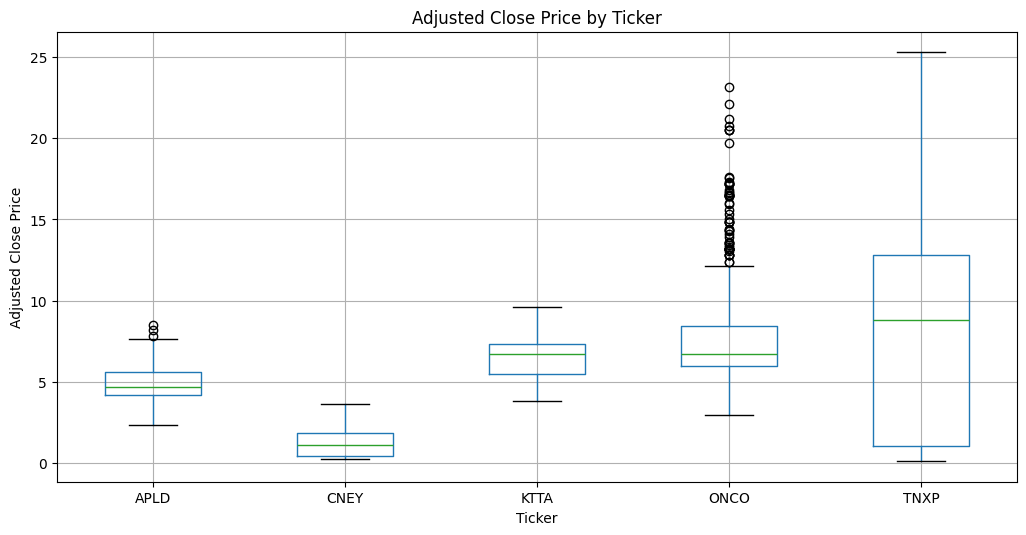

In [21]:
df.boxplot(column='Adjclose', by='Ticker', figsize=(12,6))
plt.ylabel('Adjusted Close Price')
plt.title('Adjusted Close Price by Ticker')
plt.suptitle('')
plt.show()

CNEY has the lowest median adjusted close value. It has a relatively narrow box which indicates low variability in price. The smaller IQR suggests the stock's prices are tightly clustered, indicating less volatility and more stable performance. The lower whisker is short which means minimal downward price movement. However, the overall price is very close to 0 so this stock has been consistently trading at very low levels, which may indicate limited investor confidence or growth potential. It is the only stock based outside of the U.S., in China. 

ONCO and APLD have outliers on the upper tail (especially ONCO), meaning there are many instances of significantly higher prices that deviate from the usual trading range. This can suggest high volatility, with sudden price spikes due to speculative trading, news events, or changes in market sentiment. ONCO may be a highly speculative stock. APLD is the only tech stock on the list. 

TNXP has the greatest IQR - this stock is more prone to fluctuations that are part of teh normal trading range, without the many extreme outliers like ONCO. The greater spread in prices below the median means there is more volatility in the lower half of the prices. There may have been significant downward pressure during certain periods that are part of normal price behaviour. However, there is a wider upper whisker, which means the stock also experiences upward price movements. 

APLD, CNEY, and KTTA are less volatile than the other stocks. It is interesting how KTTA is still a part of the biopharmaceutical sector like ONCO and TNXP, yet it is less volatile.

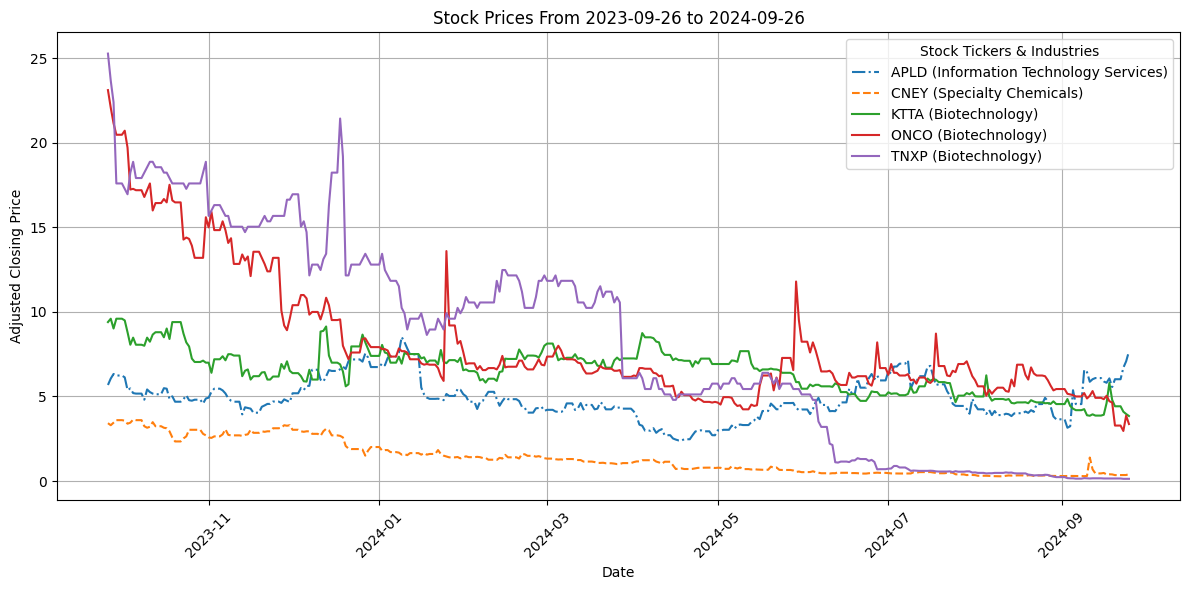

In [ ]:
plt.figure(figsize=(12, 6))

# Get unique industries and define line styles
line_styles = ['-.', '--', '-', ':']  # Different line styles
style_map = {industry: line_styles[i % len(line_styles)] for i, industry in enumerate(df.Industry.unique())}

# Create a list to hold custom legend handles
legend_handles = []

# Loop through each ticker to plot
for ticker in df['Ticker'].unique():
    dfbyticker = df[df['Ticker'] == ticker]
    industry = dfbyticker['Industry'].iloc[0]  # Get the industry for the ticker
    line_style = style_map[industry]  # Get the line style for the industry
    
    # Plot the adjusted closing price
    line, = plt.plot(dfbyticker.index, dfbyticker['Adjclose'], 
                     label=ticker, 
                     linestyle=line_style)  # Apply the industry line style
    
    # Create a custom legend handle with the same color as the line
    legend_handles.append((industry, ticker, line.get_color(), line_style))  # Store as a tuple

# Create legend lines with appropriate colors (without sorting)
legend_lines = [mlines.Line2D([], [], color=color, linestyle=style, label=f'{ticker} ({industry})') 
                for industry, ticker, color, style in legend_handles]

plt.title(f'Stock Prices From {start_date} to {end_date}')
plt.xlabel('Date')
plt.ylabel('Adjusted Closing Price')
plt.xticks(rotation=45)

# Add the custom legend with colored handles
plt.legend(handles=legend_lines, title='Stock Tickers & Industries')

plt.grid()
plt.tight_layout()
plt.show()

## <a id='toc1_1_'></a>[Decomposition & ADF and KPSS Tests for Stationarity](#toc0_)

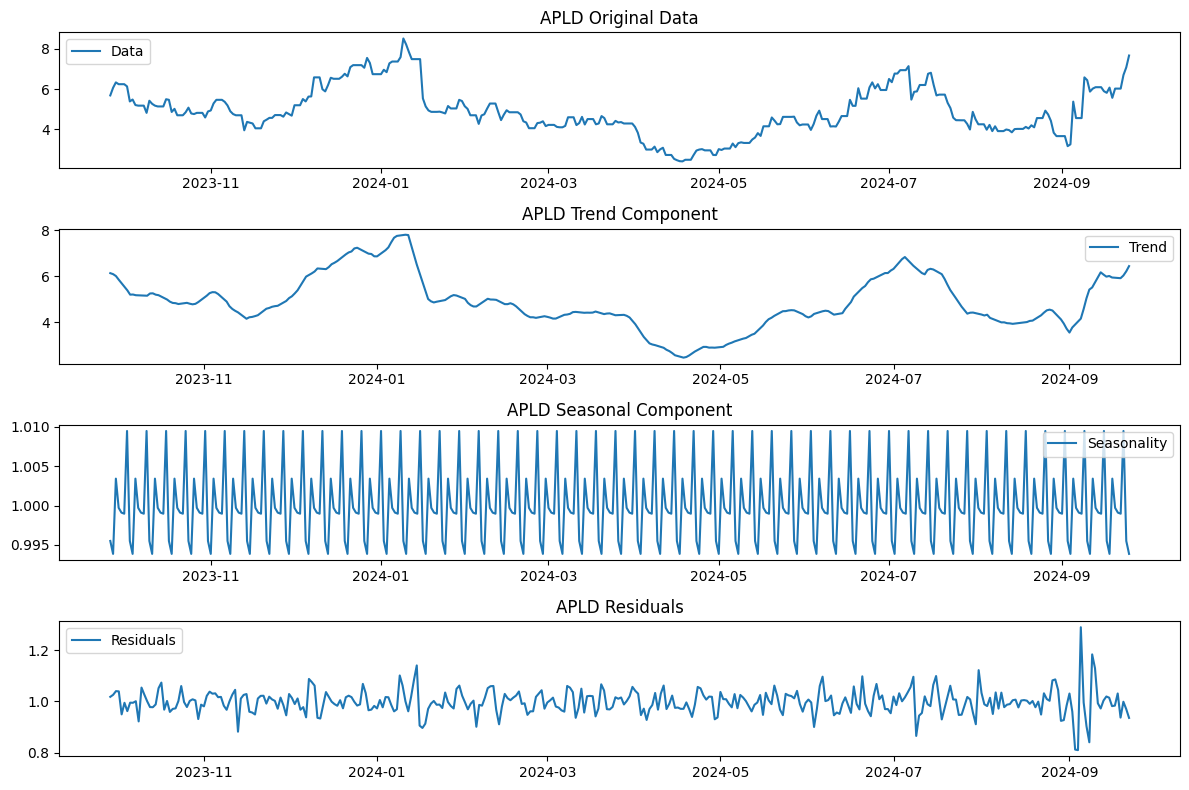

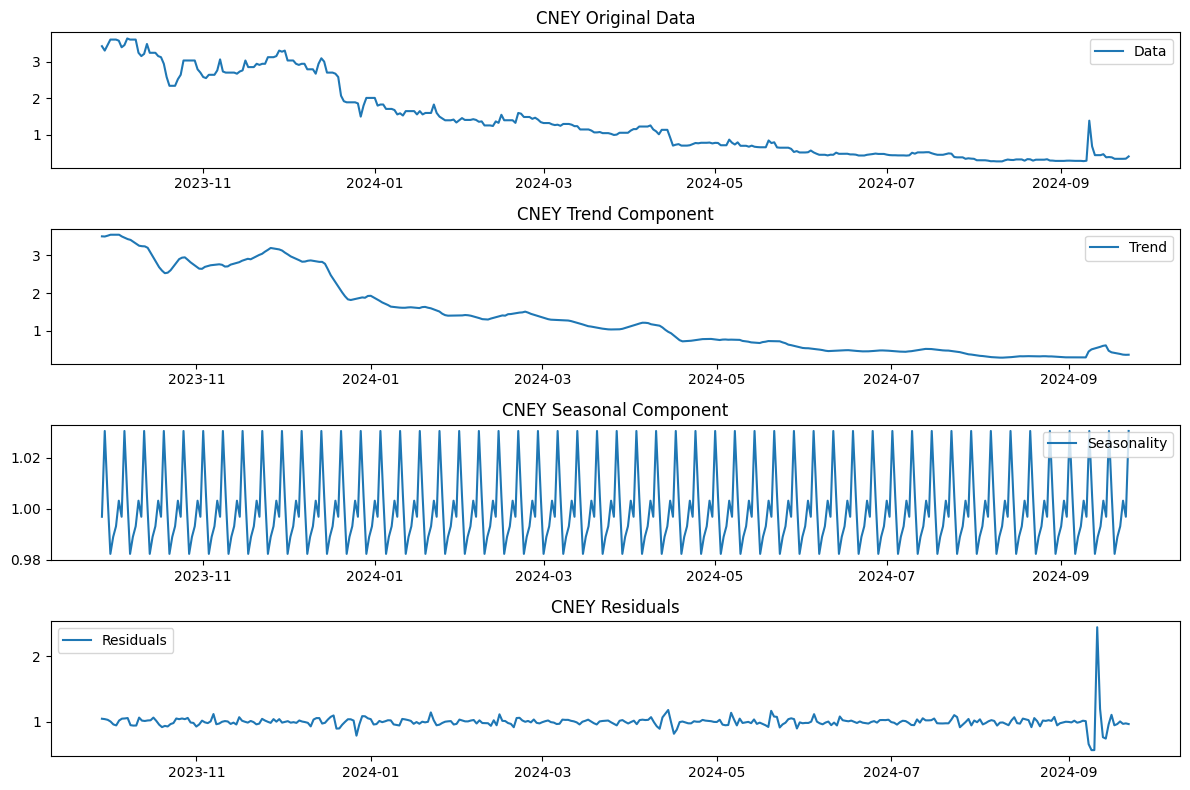

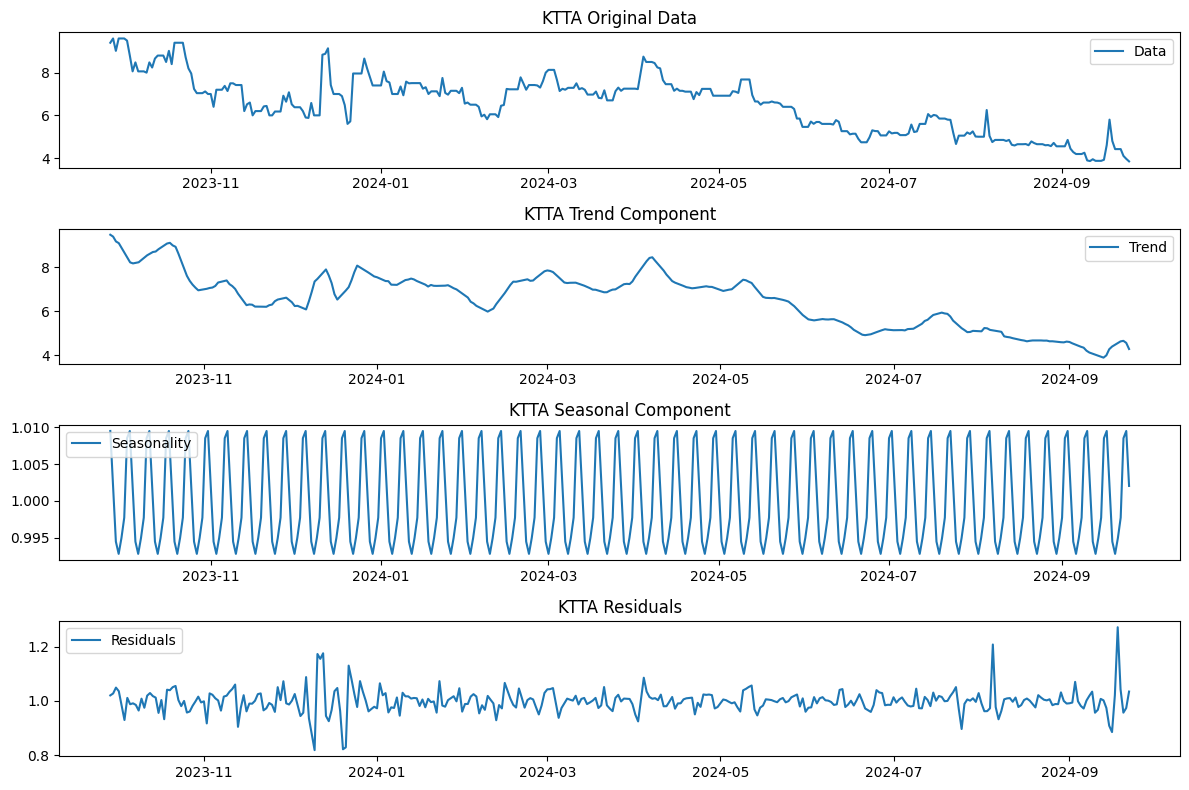

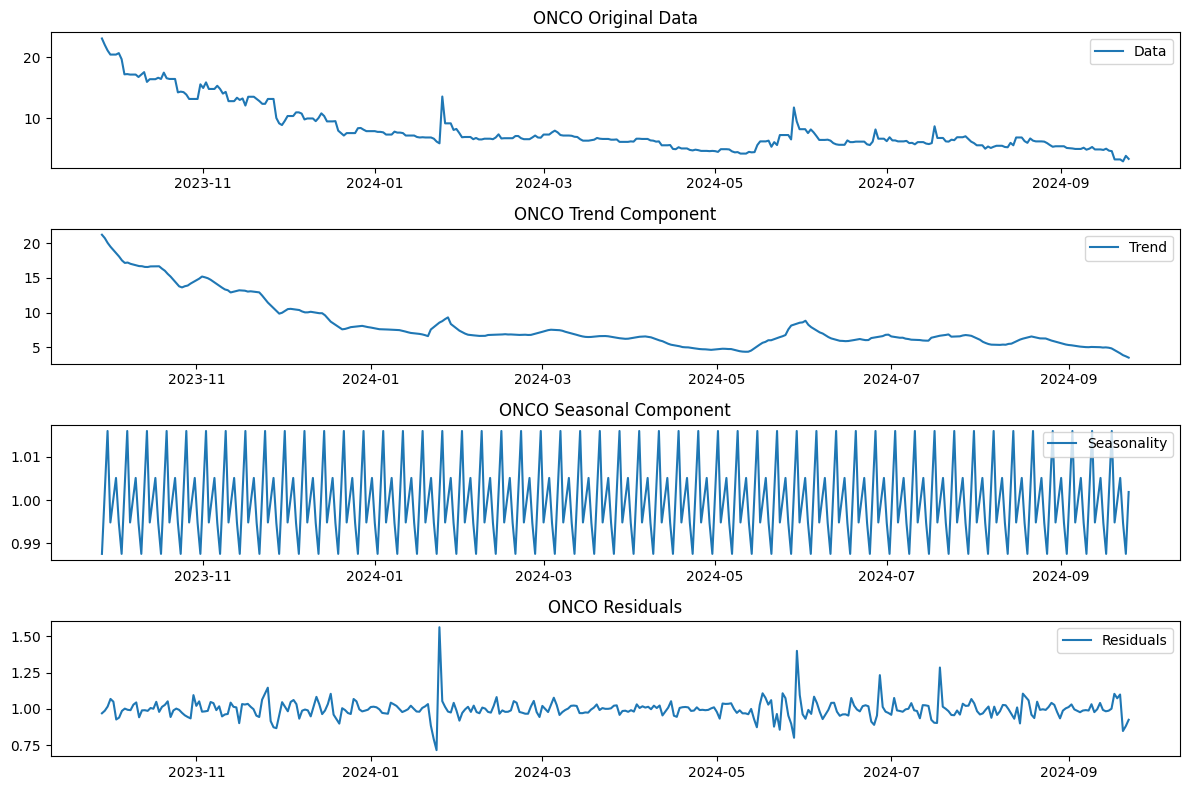

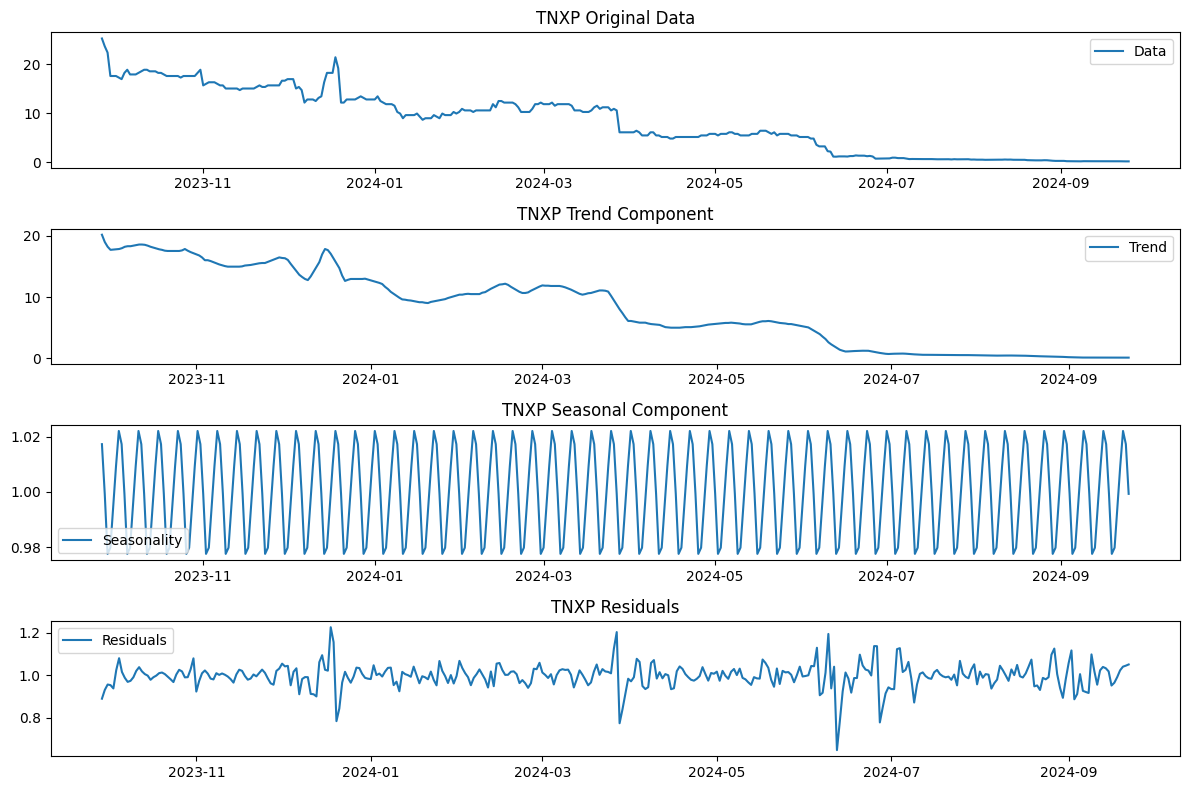

In [23]:
#plot each graph of seasonal decompose (multiplicative) for each ticker using Adjclose, list comprehension
seasonal_decompositions = [seasonal_decompose(df[df['Ticker'] == ticker]['Adjclose'], model='multiplicative')
                           for ticker in df['Ticker'].unique()]

for decomp, ticker in zip(seasonal_decompositions, df['Ticker'].unique()):
    plt.figure(figsize=(12, 8))

    plt.subplot(411)
    plt.plot(decomp.observed, label='Data')
    plt.title(f'{ticker} Original Data')
    plt.legend(loc='best')

    plt.subplot(412)
    plt.plot(decomp.trend, label='Trend')
    plt.title(f'{ticker} Trend Component')
    plt.legend(loc='best')

    plt.subplot(413)
    plt.plot(decomp.seasonal, label='Seasonality')
    plt.title(f'{ticker} Seasonal Component')
    plt.legend(loc='best')

    plt.subplot(414)
    plt.plot(decomp.resid, label='Residuals')
    plt.title(f'{ticker} Residuals')
    plt.legend(loc='best')

    plt.tight_layout()
    plt.show()



All stocks except for APLD show a downward trend. APLD's stock experiences a high in the beginning of 2024, then drops down to its lowest in mid April, then recovers in July 2024 before dropping again in early September. By October it seems to recover again. CNEY begins at its highest then drops down significantly from early 2024, before flattening out throughout the whole year. Its seasonal component is steadier and it has the least residual activity, with 1 pronounced spike in Sep 2024. KTTA also begins at its highest - APLD and KTTA have more peaks and ridges in its price movements compared to other stocks, indicating more short-term volatility. These stocks show the smallest seasonal fluctuations - price movements due to seasonality are almost negligible, and these components are more likely driven by non-seasonal events than cyclical factors. 

The residual plot for APLD and ONCO show why we saw some outliers in the boxplot - APLD shows a price shock in the beginning of September. CNEY and KTTA residuals show a similar price shock with a bit of a lag. ONCO and TNXP start at a relatively high price of around 20. ONCO's downward trend started as early as Autumn 2023, while TNXP's fall was more gradual, flattening out in April and late June of 2024. Both show pronounced residual spikes. 

**It is interesting how KTTA, ONCO, and TNXP show price shocks at different levels and dates. We should consider non duplicate keywords in our queries. KTTA and TNXP also show a similar price shock at the end of 2023.**

In [24]:
for ticker in df.Ticker.unique():
    result=adfuller(df[df.Ticker==ticker].Adjclose)
    print(f'{ticker} ADF Statistic: {result[0]:.3f}, p-value: {result[1]:.3f}')

APLD ADF Statistic: -2.358, p-value: 0.154
CNEY ADF Statistic: -1.715, p-value: 0.423
KTTA ADF Statistic: -1.427, p-value: 0.569
ONCO ADF Statistic: -3.611, p-value: 0.006
TNXP ADF Statistic: -1.189, p-value: 0.678


The null hypothesis for the ADF Statistic is that the time series is non-stationary. We are able to reject the null for only the ONCO series. Hence we conclude it is stationary from the ADF test.

In [25]:
for ticker in df.Ticker.unique():
    result=kpss(df[df.Ticker==ticker].Adjclose)
    print(f'{ticker} KPSS Statistic: {result[0]:.3f}, p-value: {result[1]:.3f}')

APLD KPSS Statistic: 0.398, p-value: 0.078
CNEY KPSS Statistic: 2.867, p-value: 0.010
KTTA KPSS Statistic: 2.207, p-value: 0.010
ONCO KPSS Statistic: 2.120, p-value: 0.010
TNXP KPSS Statistic: 3.044, p-value: 0.010


/tmp/ipykernel_8730/3563823793.py:2: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  result=kpss(df[df.Ticker==ticker].Adjclose)
/tmp/ipykernel_8730/3563823793.py:2: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  result=kpss(df[df.Ticker==ticker].Adjclose)
/tmp/ipykernel_8730/3563823793.py:2: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  result=kpss(df[df.Ticker==ticker].Adjclose)
/tmp/ipykernel_8730/3563823793.py:2: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  result=kpss(df[df.Ticker==ticker].Adjclose)


The KPSS test has a null hypothesis of the time series being stationary. We are able to reject the null for all stocks except the APLD series. Hence, only APLD seems stationary from the KPSS tests. All tests conclude that KTTA, TNXP, and CNEY are non-stationary. ONCO and APLD show conflicting results but it may make sense to apply a differencing and log transform to all stocks to stabilize them. 

In [26]:
df.shape

(1830, 12)

In [27]:
df['Logdiff']=df.groupby('Ticker').Adjclose.transform(lambda x: np.log(x).diff())

In [28]:
df.groupby('Ticker').Logdiff.head()

Date
2023-09-26         NaN
2023-09-27    0.064759
2023-09-28    0.043590
2023-09-29   -0.014320
2023-09-30    0.000000
2023-09-26         NaN
2023-09-27   -0.035718
2023-09-28    0.044452
2023-09-29    0.042560
2023-09-30    0.000000
2023-09-26         NaN
2023-09-27    0.021053
2023-09-28   -0.062319
2023-09-29    0.062319
2023-09-30    0.000000
2023-09-26         NaN
2023-09-27   -0.046026
2023-09-28   -0.042560
2023-09-29   -0.032664
2023-09-30    0.000000
2023-09-26         NaN
2023-09-27   -0.065383
2023-09-28   -0.055570
2023-09-29   -0.241162
2023-09-30    0.000000
Name: Logdiff, dtype: float64

In [29]:
#drop nan rows from df
df.dropna(subset=['Logdiff'], inplace=True)
df.groupby('Ticker').Logdiff.head()


Date
2023-09-27    0.064759
2023-09-28    0.043590
2023-09-29   -0.014320
2023-09-30    0.000000
2023-10-01    0.000000
2023-09-27   -0.035718
2023-09-28    0.044452
2023-09-29    0.042560
2023-09-30    0.000000
2023-10-01    0.000000
2023-09-27    0.021053
2023-09-28   -0.062319
2023-09-29    0.062319
2023-09-30    0.000000
2023-10-01    0.000000
2023-09-27   -0.046026
2023-09-28   -0.042560
2023-09-29   -0.032664
2023-09-30    0.000000
2023-10-01    0.000000
2023-09-27   -0.065383
2023-09-28   -0.055570
2023-09-29   -0.241162
2023-09-30    0.000000
2023-10-01    0.000000
Name: Logdiff, dtype: float64

In [30]:
df.shape

(1825, 13)

In [31]:
for ticker in df.Ticker.unique():
    y=df[df.Ticker==ticker].Logdiff
    result=adfuller(y)
    print(f'{ticker} ADF Statistic (logged & diffed): {result[0]:.3f}, p-value: {result[1]:.3f}')
    result=kpss(y)
    print(f'{ticker} KPSS Statistic (logged & diffed): {result[0]:.3f}, p-value: {result[1]:.3f}')


APLD ADF Statistic (logged & diffed): -7.452, p-value: 0.000
APLD KPSS Statistic (logged & diffed): 0.141, p-value: 0.100
CNEY ADF Statistic (logged & diffed): -14.527, p-value: 0.000
CNEY KPSS Statistic (logged & diffed): 0.085, p-value: 0.100
KTTA ADF Statistic (logged & diffed): -9.508, p-value: 0.000
KTTA KPSS Statistic (logged & diffed): 0.078, p-value: 0.100


/tmp/ipykernel_8730/1534660284.py:5: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  result=kpss(y)
/tmp/ipykernel_8730/1534660284.py:5: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  result=kpss(y)
/tmp/ipykernel_8730/1534660284.py:5: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  result=kpss(y)


ONCO ADF Statistic (logged & diffed): -11.888, p-value: 0.000
ONCO KPSS Statistic (logged & diffed): 0.124, p-value: 0.100
TNXP ADF Statistic (logged & diffed): -17.931, p-value: 0.000
TNXP KPSS Statistic (logged & diffed): 0.373, p-value: 0.089


/tmp/ipykernel_8730/1534660284.py:5: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  result=kpss(y)


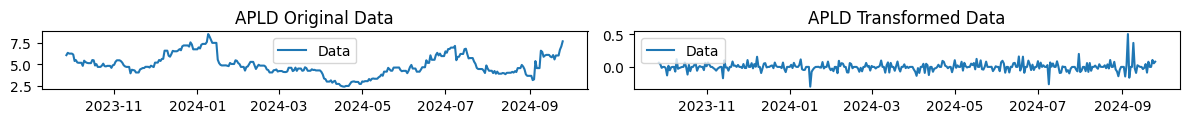

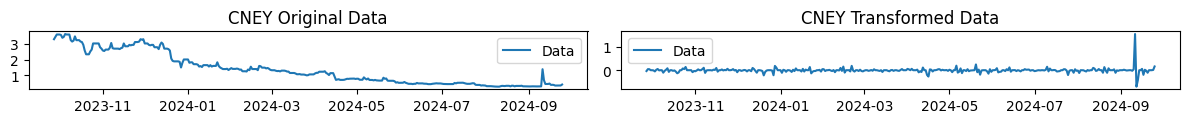

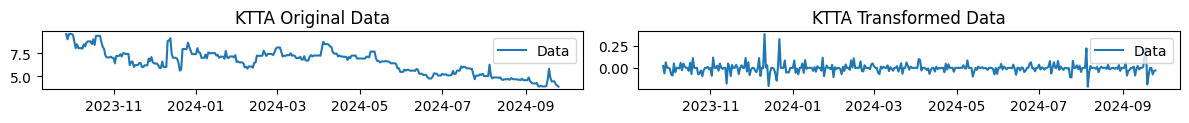

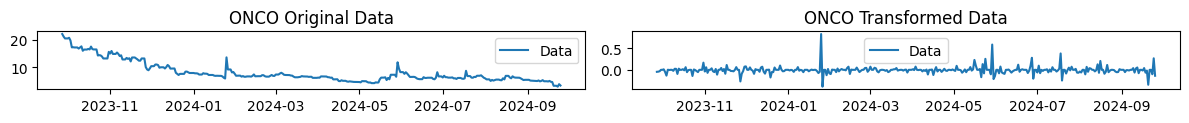

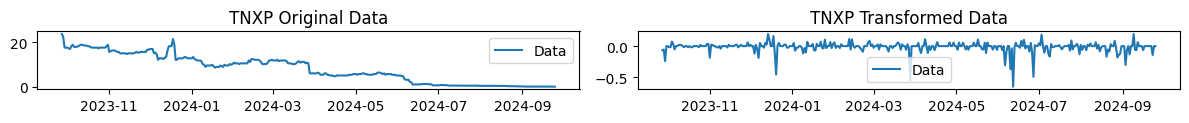

In [32]:
for ticker in df.Ticker.unique():
    y=df[df.Ticker==ticker].Adjclose
    newy=df[df.Ticker==ticker].Logdiff

    plt.figure(figsize=(12, 4))

    plt.subplot(421)
    plt.plot(y, label='Data')
    plt.title(f'{ticker} Original Data')
    plt.legend(loc='best')

    plt.subplot(422)
    plt.plot(newy, label='Data')
    plt.title(f'{ticker} Transformed Data')
    plt.legend(loc='best')

    plt.tight_layout()
    plt.show()

Each stock is now stationary as shown above. 

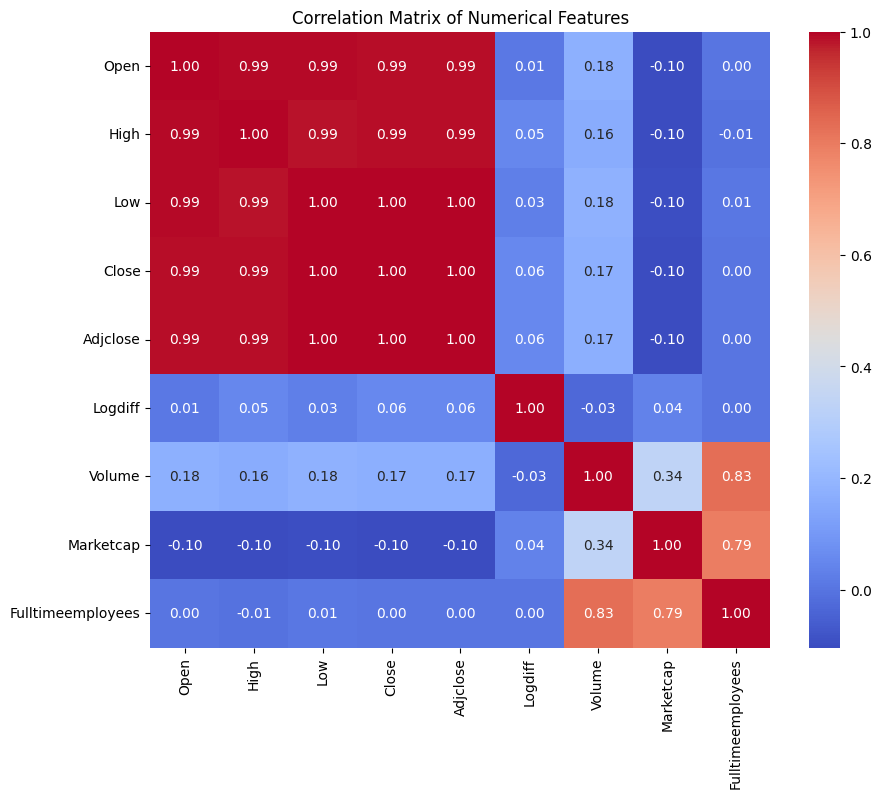

In [33]:
df_numerical = df[['Open', 'High', 'Low', 'Close', 'Adjclose', 'Logdiff', 'Volume', 'Marketcap', 'Fulltimeemployees']]
correlation_matrix = df_numerical.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix of Numerical Features')
plt.show()

As assumed, open, high, low, close, and adjusted close prices are all identical parameters. 

In [34]:
#make predictive column for "To simplify the target variable, we ask that you use a binary classifier (1/0) that denotes whether there was a price increase (1) or not (0) from the previous trading day."
for ticker in df['Ticker'].unique():
    df.loc[df['Ticker'] == ticker, 'Priceincrease'] = (df[df['Ticker'] == ticker]['Adjclose'].diff() > 0).astype(int)
df.head()

,Ticker,Open,High,Low,Close,Adjclose,Volume,Industry,Sector,Marketcap,Fulltimeemployees,Companyinfo,Logdiff,Priceincrease
Date,,,,,,,,,,,,,,
2023-09-27,APLD,5.75,6.11,5.711,6.06,6.06,8083143,Information Technology Services,Technology,1589690624,150,"Applied Digital Corporation designs, develops,...",0.064759,0.0
2023-09-28,APLD,6.10,6.52,5.970,6.33,6.33,8083143,Information Technology Services,Technology,1589690624,150,"Applied Digital Corporation designs, develops,...",0.043590,1.0
2023-09-29,APLD,6.35,6.58,6.100,6.24,6.24,8083143,Information Technology Services,Technology,1589690624,150,"Applied Digital Corporation designs, develops,...",-0.014320,0.0
2023-09-30,APLD,6.35,6.58,6.100,6.24,6.24,8083143,Information Technology Services,Technology,1589690624,150,"Applied Digital Corporation designs, develops,...",0.000000,0.0
2023-10-01,APLD,6.35,6.58,6.100,6.24,6.24,8083143,Information Technology Services,Technology,1589690624,150,"Applied Digital Corporation designs, develops,...",0.000000,0.0


In [ ]:
df.Priceincrease

Date
2023-09-27    0.0
2023-09-28    1.0
2023-09-29    0.0
2023-09-30    0.0
2023-10-01    0.0
             ... 
2024-09-21    0.0
2024-09-22    0.0
2024-09-23    0.0
2024-09-24    0.0
2024-09-25    0.0
Name: Priceincrease, Length: 1825, dtype: float64

# <a id='toc2_'></a>[Reddit data](#toc0_)

In [41]:
rdf=pd.read_csv('reddit.csv')
rdf.head()

,stock,subreddit,query,title,author,url,post_date,selftext,num_comments,comments
0,APLD,wallstreetbets,APLD,Found a newspaper from 2011. Imagine all the g...,nywarpath,https://i.redd.it/s7q97fka9vic1.jpeg,2024-02-16 03:26:31,NaN,688,[{'comment': '\n**User Report**| | | |\n:--|:-...
1,APLD,wallstreetbets,APLD,Micro Trading Options on QQQ!,Vivo__,https://i.redd.it/vd1e4xdqugnd1.jpeg,2024-09-07 22:48:32,The good side to options is its worst side! Yo...,153,[{'comment': '\n**User Report**| | | |\n:--|:-...
2,APLD,wallstreetbets,APLD,Most Anticipated Earnings Releases for the wee...,ItsNotYourFault,https://i.redd.it/d2nn39ignwbc1.png,2024-01-12 00:37:59,NaN,244,[{'comment': 'Not open on MLK Day? He’d want p...
3,APLD,wallstreetbets,APLD,Dow drops more than 400 points as Wall Street ...,mediterranean2,https://www.reddit.com/r/wallstreetbets/commen...,2024-04-02 19:07:01,The Dow Jones Industrial Average\n fell for a ...,54,[{'comment': '\n**User Report**| | | |\n:--|:-...
4,APLD,stocks,APLD,(9/20) Friday's Pre-Market News & Stock Movers,bigbear0083,https://www.reddit.com/r/stocks/comments/1flat...,2024-09-20 12:30:23,#Good Friday morning traders and investors of ...,0,[]
